# Seaborn을 사용한 데이터 시각화

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지입니다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존하여 생성합니다. Seaborn에 대한 자세한 내용은 다음 Document에서 확인할 수 있습니다.

* http://seaborn.pydata.org/

시작을 위한 기초적인 패키지는 다음과 같습니다

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc('font', family='NanumGothicOTF') # For MacOS
#plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )



['NanumGothic']
# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
#경로는 각자 나눔고딕 위치입니다!
font_fname = 'C:\\Users\\SUB\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic_0.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

In [3]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  C:\Users\SUB\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


## 1차원 분포 플롯

1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타냅니다.

연습을 위한 샘플 데이터는 다음과 같습니다. 별도 다운로드할 필요없이 패키지에 내장되어있는 데이터를 활용합니다.

In [5]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### 1차원 실수 분포 플롯

실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공합니다. 1차원 실수 분포 플롯 명령에는 `rugplot`, `kdeplot`, `distplot`이 있다.

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여주는 그래프 입니다

* `rugplot`: http://seaborn.pydata.org/generated/seaborn.rugplot.html

C:\Users\SUB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SUB\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


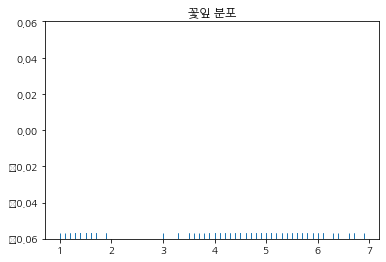

In [13]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("꽃잎 분포")
plt.show()
plt.rcParams['font.family'] = 'NanumGothic'

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법입니다.

* `kdeplot`: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조합니다.

* http://scikit-learn.org/stable/modules/density.html

Text(0.5, 1.0, 'Iris Data Flower Length Kernel Density Plot')

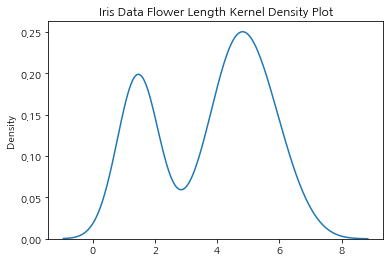

In [23]:
sns.kdeplot(x)
plt.title("Iris Data Flower Length Kernel Density Plot")


Seaborn의 `distplot` 명령은 러그와 커널 밀도를 동시에 표시가 가능하여 Matplotlib의 `hist` 보다 유용하게 사용이 가능합니다

* `distplot`: http://seaborn.pydata.org/generated/seaborn.distplot.html

C:\Users\SUB\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUB\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


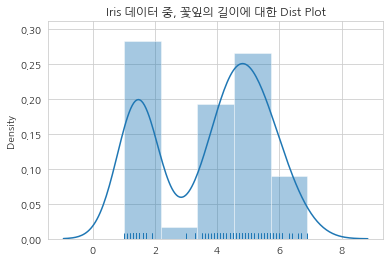

In [53]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 카운트 플롯

`countplot` 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시 

* `countplot`: http://seaborn.pydata.org/generated/seaborn.countplot.html

`countplot` 명령은 데이터프레임에만 사용할 수 있다. 사용 방법

```
countplot(x="column_name", data=dataframe)
```

`data` 인수에는 대상이 되는 데이터프레임을, `x` 인수에는 데이터프레임의 열 이름 문자열을 넣고 사용합니다.

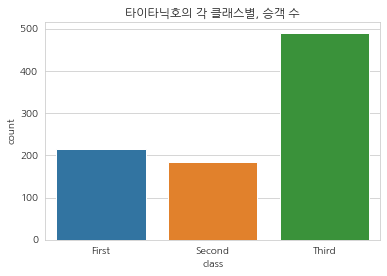

In [54]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

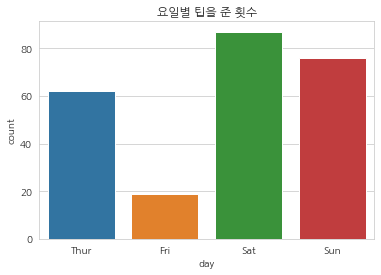

In [55]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

## 다차원 데이터

데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있습니다.

* 분석하고자 하는 데이터가 모두 실수 값인 경우
* 분석하고자 하는 데이터가 모두 카테고리 값인 경우
* 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우


### 2차원 실수형 데이터

만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용합니다 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 `jointplot` 명령을 사용합니다. `jointplot` 을 실행하게 되면, 각 축 바깥쪽으로 또다른 그래프를 그리는 것이 가능합니다

* `jointplot`: http://seaborn.pydata.org/generated/seaborn.jointplot.html

`jointplot` 명령도 데이터프레임에만 사용할 수 있습니다. 사용 방법은 다음과 같습니다.

```
jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
```

`data` 인수에는 대상이 되는 데이터프레임을, `x` 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을, `y` 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣습니다. `kind`는 차트의 종류

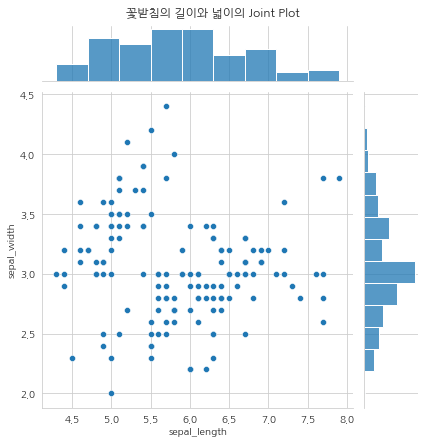

In [56]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

`kind='kde'`이면 커널 밀도 히스토그램

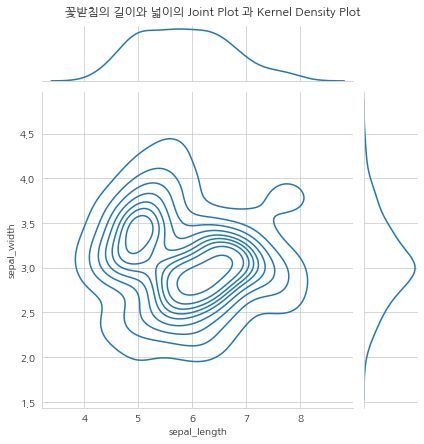

In [57]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

`kind='hex'`이면 육각 밀도 히스토그램

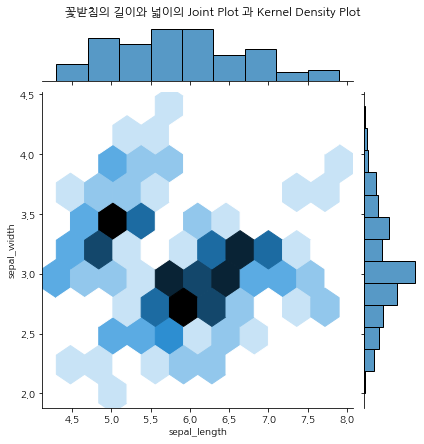

In [7]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터

만약 3차원 이상의 데이터라면 seaborn 패키지의 `pairplot` 명령을 사용하여 여러개의 변수의 분포를 확인할 수 있습니다. 
`pairplot`은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그리는 기능을 수행합니다. 
같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 표시합니다.

* `pairplot`: http://seaborn.pydata.org/generated/seaborn.pairplot.html

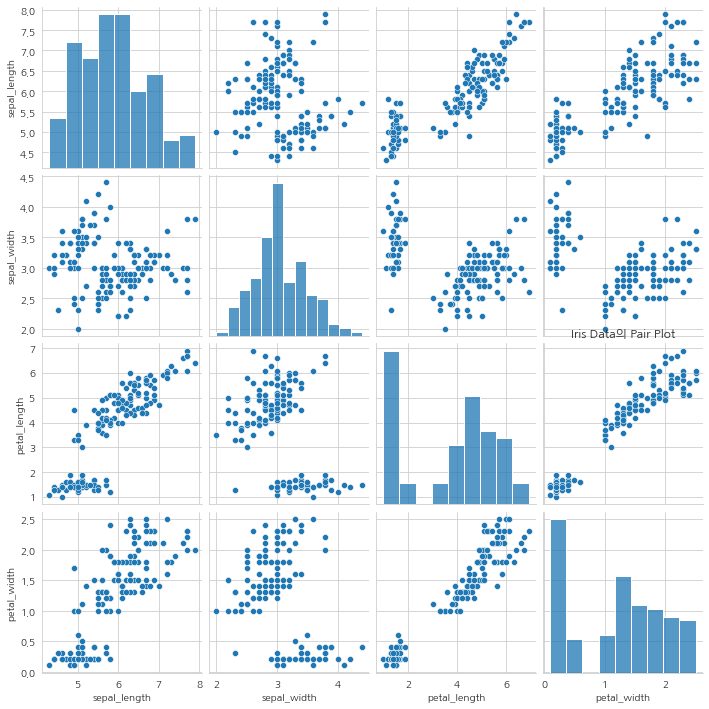

In [58]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 `hue` 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있습니다

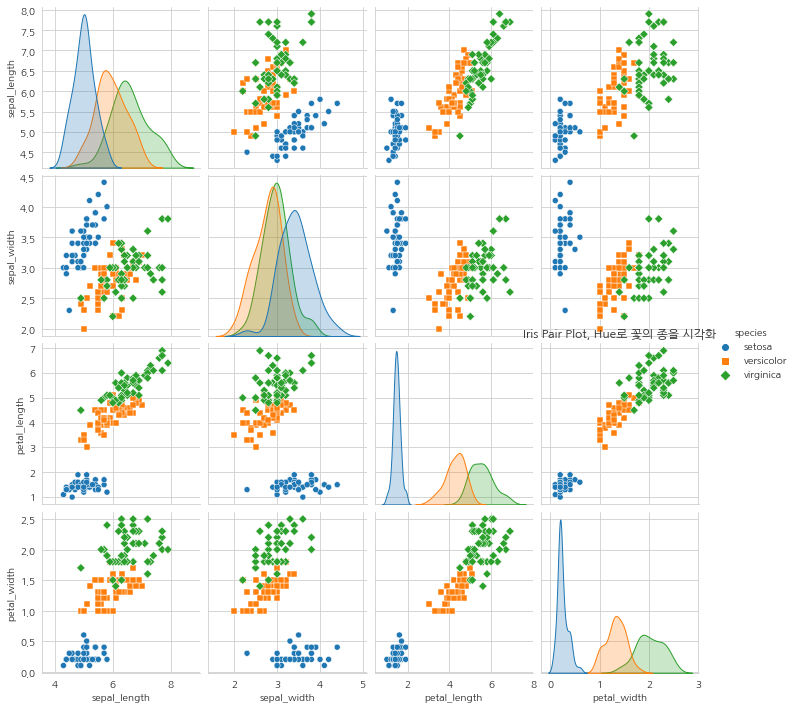

In [59]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

adsf                

### 2차원 카테고리 데이터

만약 데이터가 2차원이고 모든 값이 카테고리  값이면  `heatmap` 명령을 사용하여 분포를 확인할 수 있습니다.

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [60]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


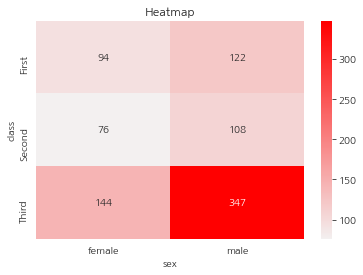

In [61]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "red", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용하여 그래프를 그릴 수 있습니다.

* `barplot` - 막대차트
* `boxplot` - 박스플롯
* `pointplot` - 점그래프
* `violinplot` - 바이올린차트
* `stripplot` - 스트립플롯
* `swarmplot` - 스웜플롯

`barplot` 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성합니다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

* `barplot`: http://seaborn.pydata.org/generated/seaborn.barplot.html

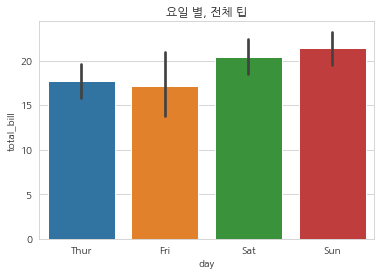

In [62]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

`boxplot` 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려줍니다. 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어져 있습니다. 

* `boxplot`: http://seaborn.pydata.org/generated/seaborn.boxplot.html

박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 합니다
박스 내부의 가로선은 중앙값을 나타냅니다

그 바깥의 점은 아웃라이어(outlier)라고 부르는데 범위 밖의 값을 표시하는 것으로 나타냅니다. 개별적인 점으로 표시합니다.

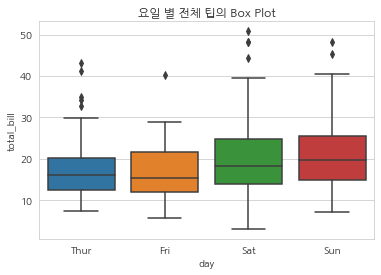

In [63]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

`boxplot`이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 `violinplot`, `stripplot`. `swarmplot` 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있습니다. 

`violinplot`은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다하여 그 이름이 바이올린플롯입니다.

* `violinplot`: http://seaborn.pydata.org/generated/seaborn.violinplot.html

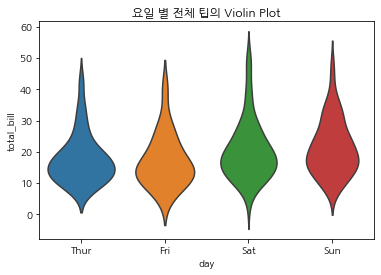

In [16]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

`stripplot`은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려줍니다. `jitter=True`를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 보여줄 수 있습니다.

* `stripplot`: http://seaborn.pydata.org/generated/seaborn.stripplot.html

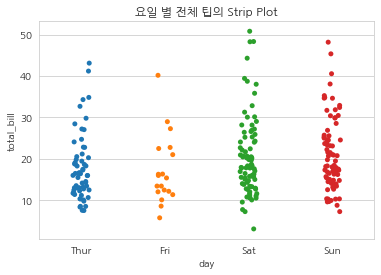

In [65]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

`swarmplot`은 `stripplot`과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.

* `swarmplot`: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

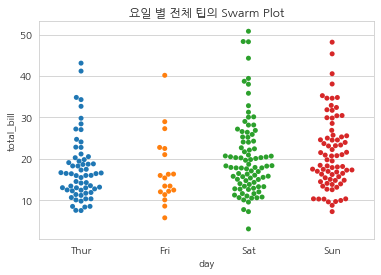

In [66]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

## 다차원 복합 데이터

지금까지 소개한 대부분의 명령어에는 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있다. 

예를 들어 `barplot`, `violinplot`, `boxplot` 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 `hue` 인수를 제공한다. `hue` 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화된다.  `hue` 값이 시각화되는 방법은 플롯의 종류에 따라 다르다.

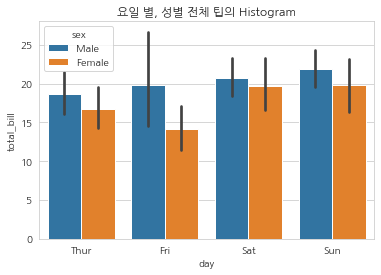

In [67]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

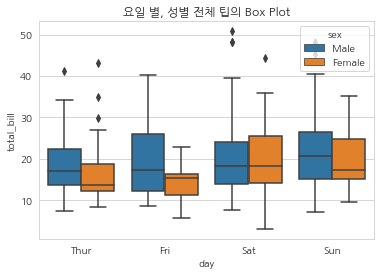

In [68]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

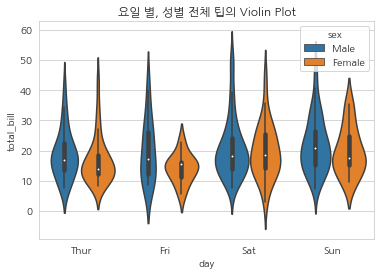

In [69]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

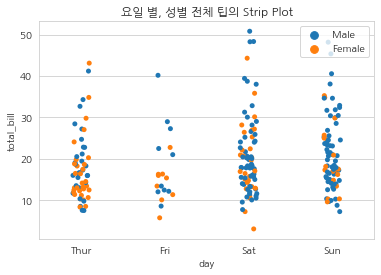

In [70]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

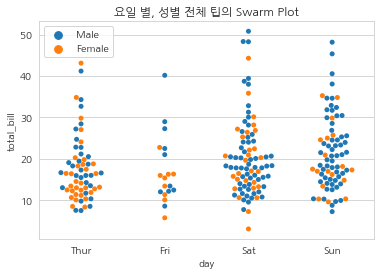

In [71]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=0)
plt.show()

`stripplot`, `violinplot`, `swarmplot` 등 에서는 `split` 또는 `dodge` 옵션으로 시각화 방법을 변경할 수도 있습니다.

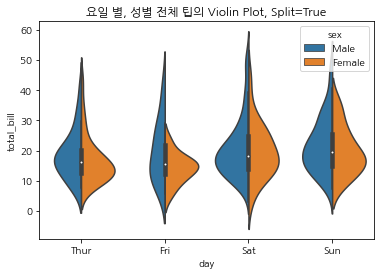

In [7]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

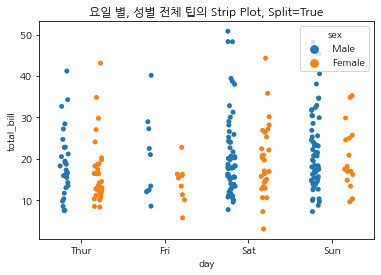

In [15]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
#jitter = 각 항목 겹쳐 표시 방지
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

C:\Users\SUB\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


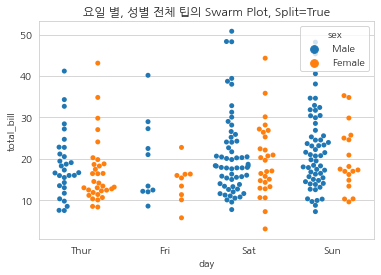

In [74]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

`heatmap`을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있습니다.

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

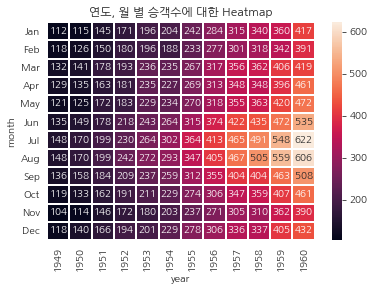

In [75]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
#annot : 각 구간별 값들을 표시할 것인지에 대한 여부
#fmt : 표시기법(10,16진법 등)
#linewidth = 선의 굵기
plt.show()

# Regplot
regplot은 scatter plot와 line plot을 함께 볼 수 있는 데이터 시각화 방법입니다. 


C:\Users\SUB\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


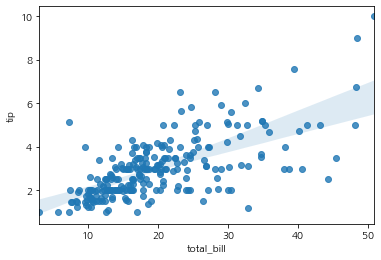

In [8]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

# Lmplot
lmplot은 regplot + facetgrid의 형태로, regplot을 각 변수별로 나누어 여러개 보고 싶을때 사용합니다.

C:\Users\SUB\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


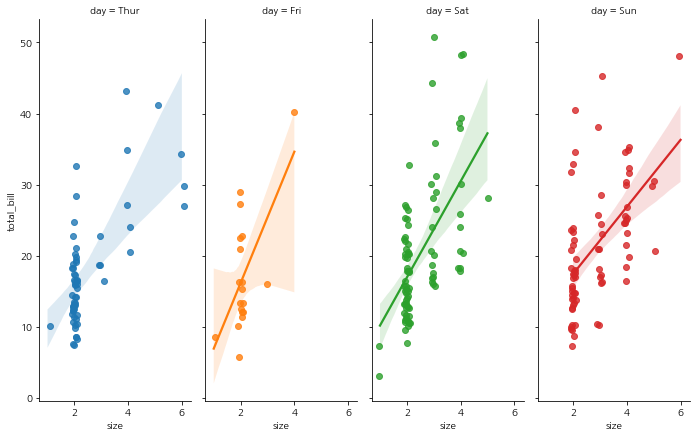

In [10]:
g = sns.lmplot(x="size", y="total_bill", hue="day", col="day",
               data=tips, height=6, aspect=.4, x_jitter=.1)

## 기타

시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있습니다. 다만 보여주고자 하는 것이 너무 많을 경우 정보의 혼선이 발생할 수 있으므로 유의합니다!

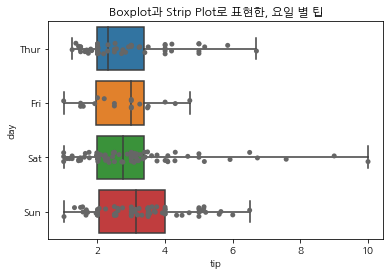

In [28]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
#whis = 수염 길이를 어디까지 늘릴 것인지
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

In [77]:
sns.boxplot?

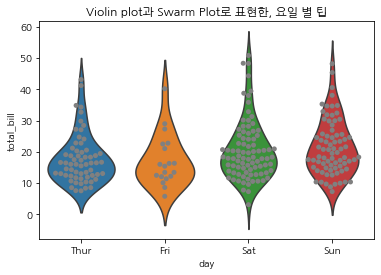

In [17]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
#inner
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.5")
plt.show()

## 스타일

Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 변경하게 됩니다. 따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다르게 표시됩니다. 자세한 내용은 다음 문서를 참조한다.

* http://seaborn.pydata.org/tutorial/aesthetics.html

`set` 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 변경
`set_style` 명령은 틱 스타일만 변경합니다 `darkgrid`, `whitegrid`, `dark`, `white`, 그리고 `ticks` 스타일을 제공합니다

In [79]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

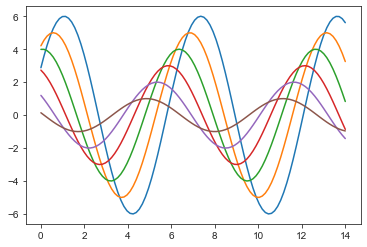

In [80]:
sns.set_style("ticks")
sinplot()

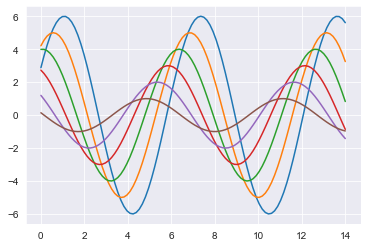

In [81]:
sns.set_style("darkgrid")
sinplot()

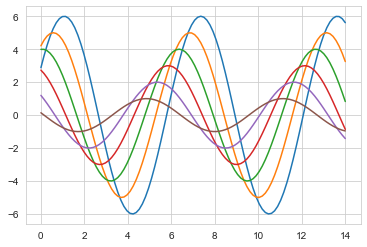

In [82]:
sns.set_style("whitegrid")
sinplot()